Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3691 - loss: 1.7196 - val_accuracy: 0.5472 - val_loss: 1.2547
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5813 - loss: 1.1810 - val_accuracy: 0.6043 - val_loss: 1.1242
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.6453 - loss: 1.0049 - val_accuracy: 0.6617 - val_loss: 0.9734
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.6962 - loss: 0.8763 - val_accuracy: 0.6897 - val_loss: 0.9012
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7283 - loss: 0.7886 - val_accuracy: 0.7012 - val_loss: 0.8651
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.7454 - loss: 0.7358 - val_accuracy: 0.6897 - val_loss: 0.9146
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.7620 - loss: 0.6780 - val_accuracy: 0.7031 - val_loss: 0.8855
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7743 -

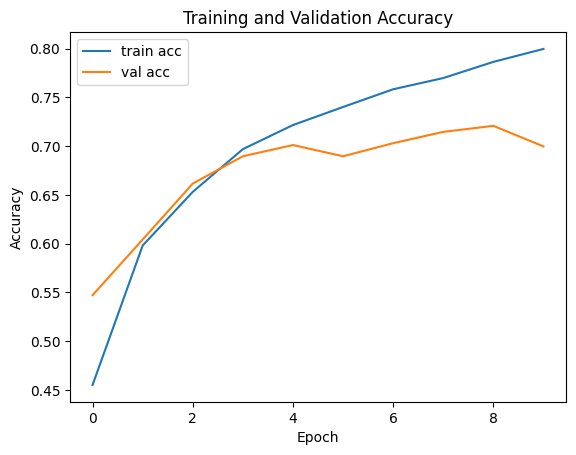

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
import tensorflow as tf


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n✅ Test Accuracy: {test_acc * 100:.2f}%')

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
